<h1>Chapter 04. Training Models</h1>

<h2>Linear Regression</h2>

Linear Regression is a machine learning algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation, making it suitable for regression tasks.

<h3>The Normal Equation</h3>

The Normal Equation is a mathematical formula in linear regression used to find the optimal model parameters that minimize the sum of squared differences between observed and predicted values. 

In [1]:
import numpy as np


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

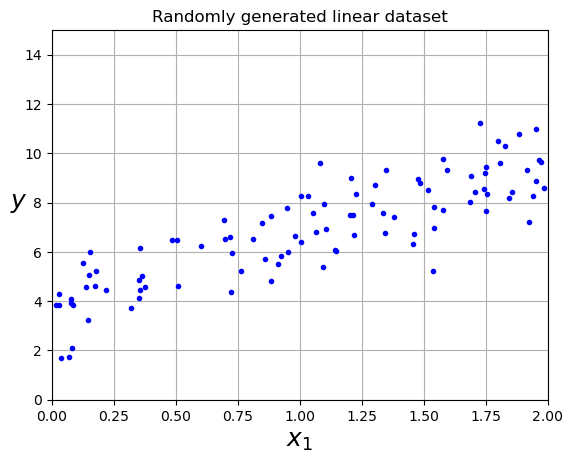

In [2]:
import matplotlib.pyplot as plt


plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('Randomly generated linear dataset')
plt.grid(True)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.84127398],
       [2.89790518]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.84127398],
       [9.63708433]])

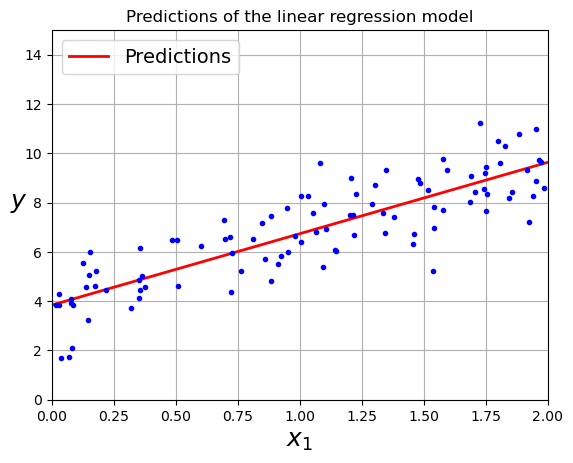

In [6]:
plt.plot(
    X_new,
    y_predict,
    'r-',
    linewidth=2,
    label='Predictions'
)
plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left', fontsize=14)
plt.title('Predictions of the linear regression model')
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate the intercept (bias) and coefficients for each feature in the linear model
lin_reg.intercept_, lin_reg.coef_

(array([3.84127398]), array([[2.89790518]]))

In [8]:
lin_reg.predict(X_new)

array([[3.84127398],
       [9.63708433]])

The `LinearRegression` class is based on the `numpy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84127398],
       [2.89790518]])

<h2>Gradient Descent</h2>

Gradient Descent is an iterative optimization algorithm used in machine learning and mathematical optimization to minimize a cost or loss function. It works by repeatedly adjusting the parameters of a model in the direction of steepest descent of the function, aiming to find the minimum point where the function's gradient (derivative) is zero, effectively optimizing model performance or finding the best fit for data.

<h3>Batch Gradient Descent</h3>

Batch Gradient Descent is a version of the Gradient Descent algorithm that updates model parameters using the average gradient of the entire training dataset in each iteration, making it computationally expensive but stable.

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.84127398],
       [2.89790518]])

Plot gradient descent with different learning rates

In [12]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(
        X,
        y,
        'b.'
    )
    n_iterations = 1000

    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(
                X_new,
                y_predict,
                style
            )

        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            theta_path.append(theta)

    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"$\eta={eta}$", fontsize=16)

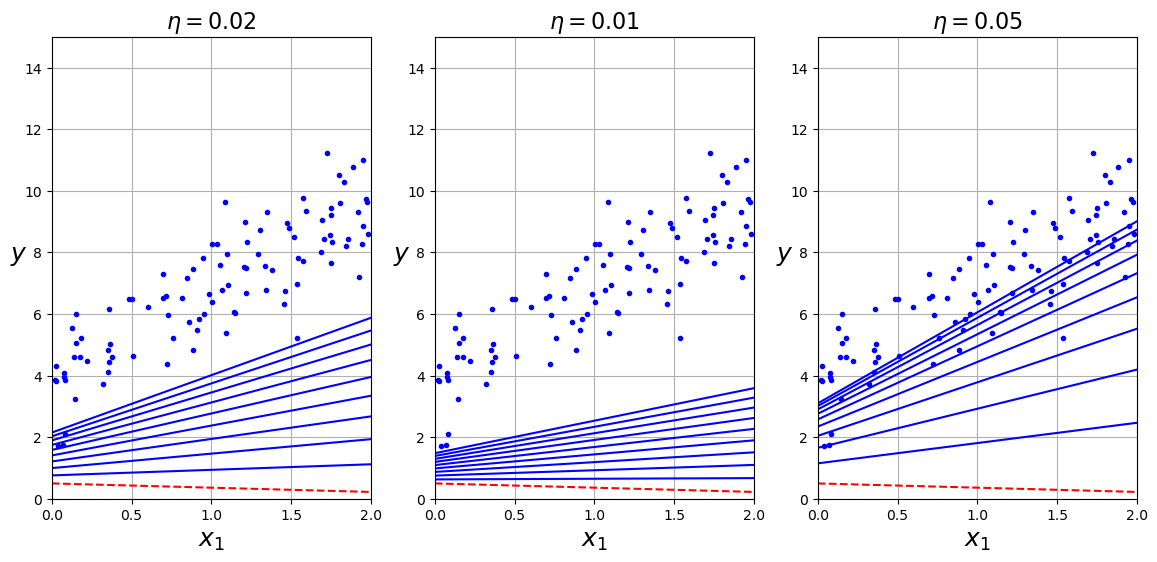

In [13]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(14, 6))

plt.subplot(131); plot_gradient_descent(theta=theta, eta=0.02)
plt.grid(True)

plt.subplot(132); plot_gradient_descent(theta=theta, eta=0.01)
plt.grid(True)

plt.subplot(133); plot_gradient_descent(theta=theta, eta=0.05, theta_path=theta_path_bgd)
plt.grid(True)

plt.show()

<h3>Stochastic Gradient Descent</h3>

Stochastic Gradient Descent (SGD) is a faster optimization algorithm in machine learning, which updates model parameters using random individual data points or small data batches for speed but with added noise.

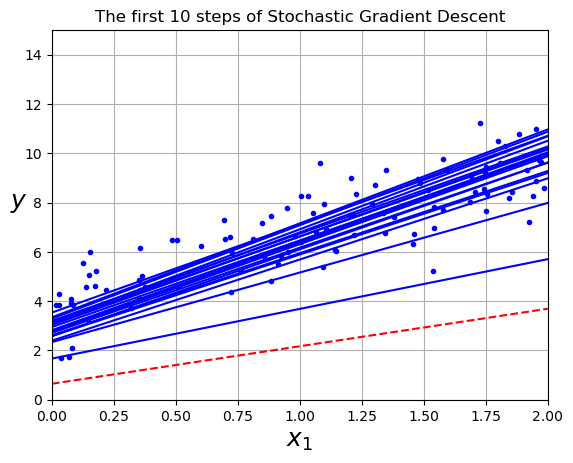

In [14]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):        
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(
                X_new,
                y_predict,
                style
            )
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('The first 10 steps of Stochastic Gradient Descent')
plt.grid(True)
plt.show()

In [15]:
theta

array([[3.87553719],
       [2.92185785]])

`SGDRegressor` implements linear regression using Stochastic Gradient Descent (SGD) as the optimization algorithm.

In [16]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty=None,
    eta0=0.1,
    random_state=42
)
sgd_reg.fit(X, y.ravel())  # use y.ravel() to a flattened (1D) array for model fitting

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84061737]), array([2.90491254]))

<h3>Mini-batch Gradient Descent</h3>

Mini-Batch Gradient Descent is a compromise between Batch and Stochastic Gradient Descent, updating model parameters with the average gradient of small random subsets of data.

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20
t0, t1 = 200, 1000

def learning_scedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_scedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[3.87594814],
       [2.9460511 ]])

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

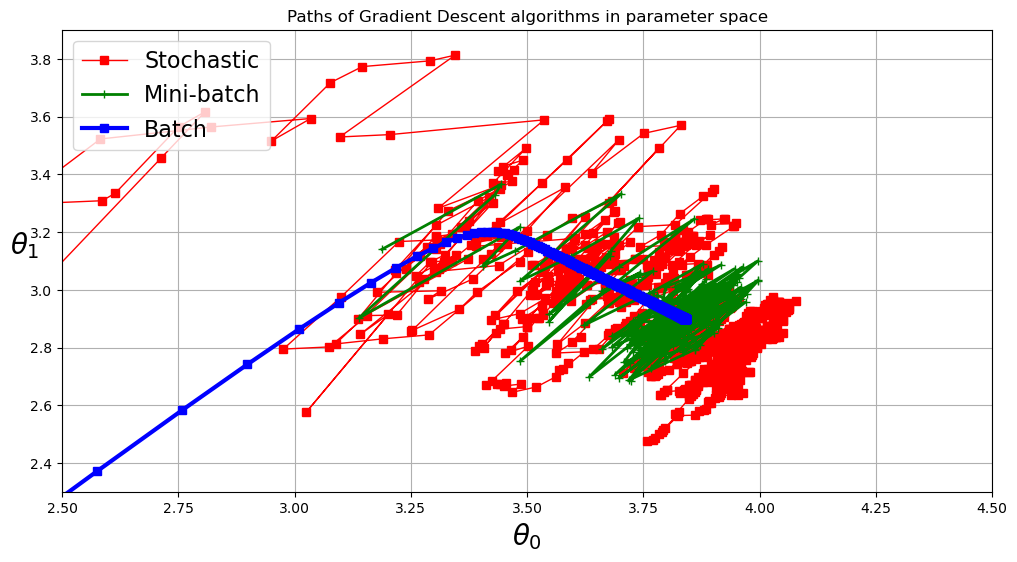

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(
    theta_path_sgd[:, 0],
    theta_path_sgd[:, 1],
    'r-s',
    linewidth=1,
    label='Stochastic'
)
plt.plot(
    theta_path_mgd[:, 0],
    theta_path_mgd[:, 1],
    'g-+',
    linewidth=2,
    label='Mini-batch'
)
plt.plot(
    theta_path_bgd[:, 0],
    theta_path_bgd[:, 1],
    'b-s',
    linewidth=3,
    label='Batch'
)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', rotation=0, fontsize=20)
plt.legend(loc='upper left', fontsize=16)
plt.title('Paths of Gradient Descent algorithms in parameter space')
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.grid(True)
plt.show()

<h2>Polynomial Regression</h2> 

Polynomial Regression is a machine learning technique used to model the relationship between a dependent variable and one or more independent variables by fitting a polynomial equation, allowing for nonlinear relationships to be captured in the data. 

In [22]:
np.random.seed(42)

# Generate nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

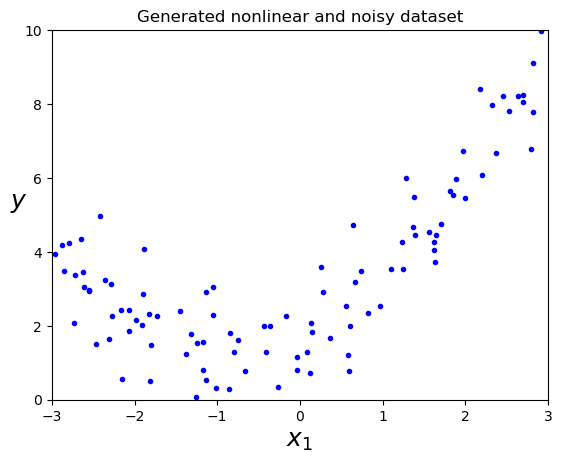

In [23]:
plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title('Generated nonlinear and noisy dataset')
plt.show()

`PolynomialFeatures` is a preprocessing technique in machine learning, provided by Scikit-Learn, that generates polynomial combinations of features to be used in polynomial regression or other nonlinear models, expanding the feature space to capture complex relationships in the data.

In [24]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)  # set polynomial feature degree, exclude a bias term
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [25]:
X_poly[0]

array([-0.75275929,  0.56664654])

Fit the `LinearRegression` model to the augmented training data

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

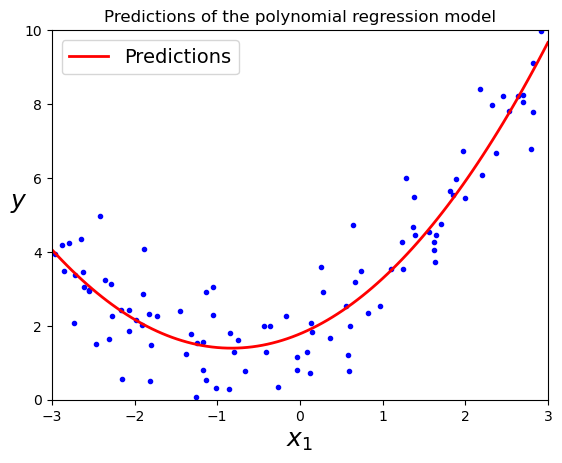

In [27]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(
    X,
    y,
    'b.'
)
plt.plot(
    X_new,
    y_new,
    'r-',
    linewidth=2,
    label='Predictions'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.legend(loc='upper left', fontsize=14)
plt.title('Predictions of the polynomial regression model')
plt.show()

<h2>Learining Curves</h2>

Learning Curves in machine learning are plots or visual representations that display the relationship between a model's performance (e.g., error or accuracy) and the amount of training data. Learning curves typically show how training and validation errors change with the size of the training dataset.

Demonstration of a 300th degree polynomial model to prior training data and comparison with a linear model

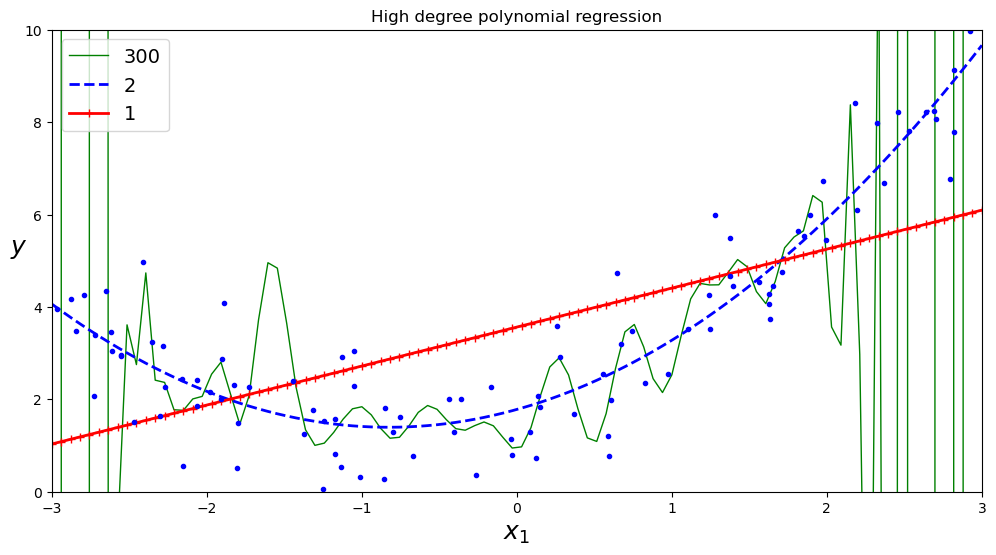

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


plt.figure(figsize=(12, 6))

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(
        X_new,
        y_newbig,
        style,
        label=str(degree),
        linewidth=width
    )

plt.plot(
    X,
    y,
    'b.',
    linewidth=3
)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title('High degree polynomial regression')
plt.show()

`plot_learning_curves` function that draws model learning curves for the specified training data

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(
        np.sqrt(train_errors),
        'r-+',
        linewidth=2,
        label='train'
    )
    plt.plot(
        np.sqrt(val_errors),
        'b-',
        linewidth=3,
        label='val'
    )
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

Plot linear regression learning curves

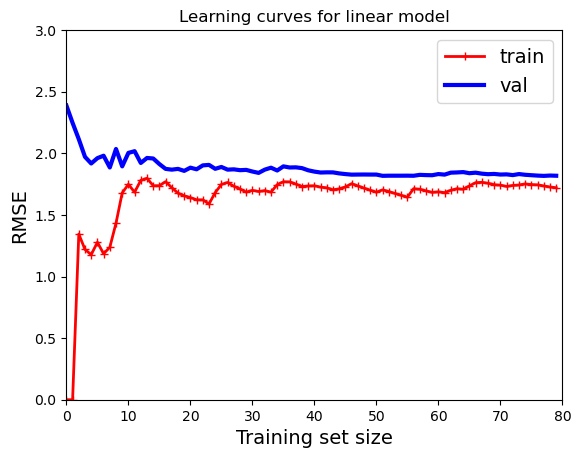

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.title('Learning curves for linear model')
plt.show()

Plot polynominal regression 10th degree learning curves

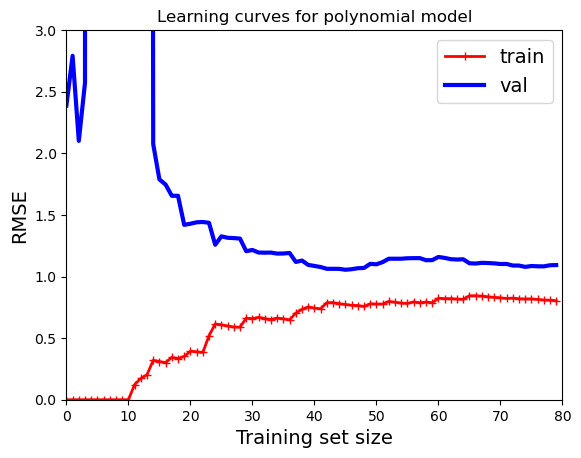

In [31]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.title('Learning curves for polynomial model')
plt.show()

<h2>Regularized Linear Models</h2>

A Regularized Linear Model incorporates regularization techniques like Ridge Regression, Lasso Regression, and Elastic Net to enhance model generalization by controlling coefficients' magnitude, handling multicollinearity, and performing feature selection.

<h3>Ridge Regression</h3>

Ridge Regression: Adds L2 regularization to linear regression, controlling overfitting and multicollinearity by penalizing large coefficients.

In [32]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X * np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [33]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)  # 'cholesky' suitable for datasets with ample memory
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[0.81231746]])

In [34]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)  # 'sag' efficient for large, high-dimensional datasets
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[0.81231707]])

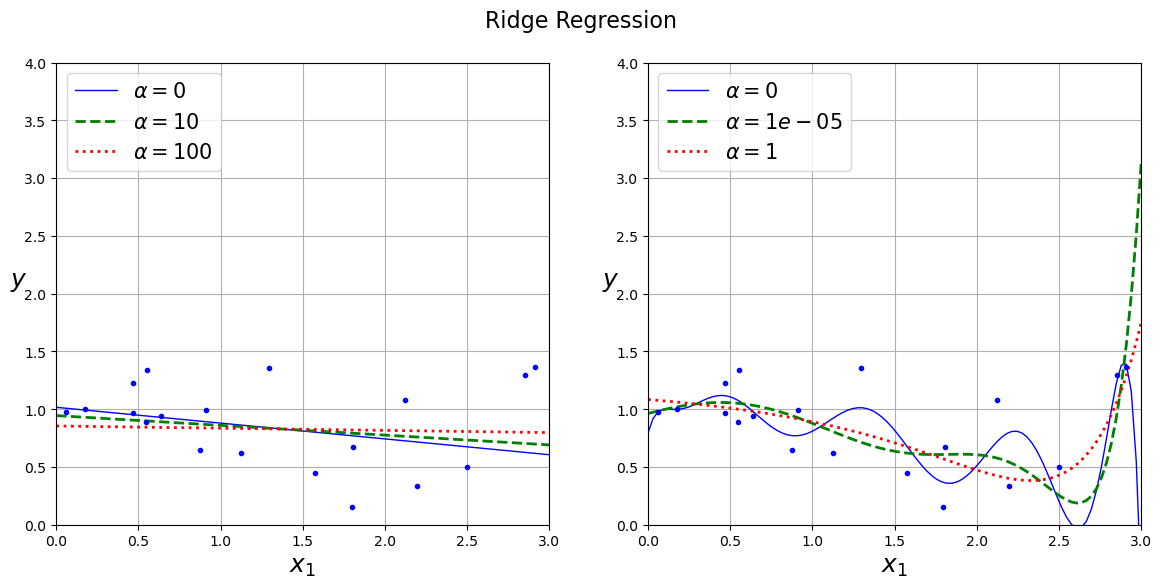

In [35]:
from sklearn.linear_model import Ridge


def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()

        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])

        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(
            X_new,
            y_new_regul,
            style,
            linewidth=2 if alpha > 0 else 1,
            label=r"$\alpha = {}$".format(alpha)
        )
    plt.plot(
        X,
        y,
        'b.',
        linewidth=3
    )
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', rotation=0, fontsize=18)
    plt.axis([0, 3, 0, 4])
    plt.legend(loc='upper left', fontsize=15)
    
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.grid(True)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10 ** -5, 1), random_state=42)
plt.grid(True)

plt.figtext(
    x=0.5,
    y=0.95,
    s='Ridge Regression',
    fontsize=16,
    ha='center',
    va='center',
)
plt.show()

<h3>Lasso Regression</h3>

Lasso Regression: Enhances linear regression by adding L1 regularization, promoting sparsity and feature selection.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.174e-01, tolerance: 3.568e-04
  model = cd_fast.enet_coordinate_descent(


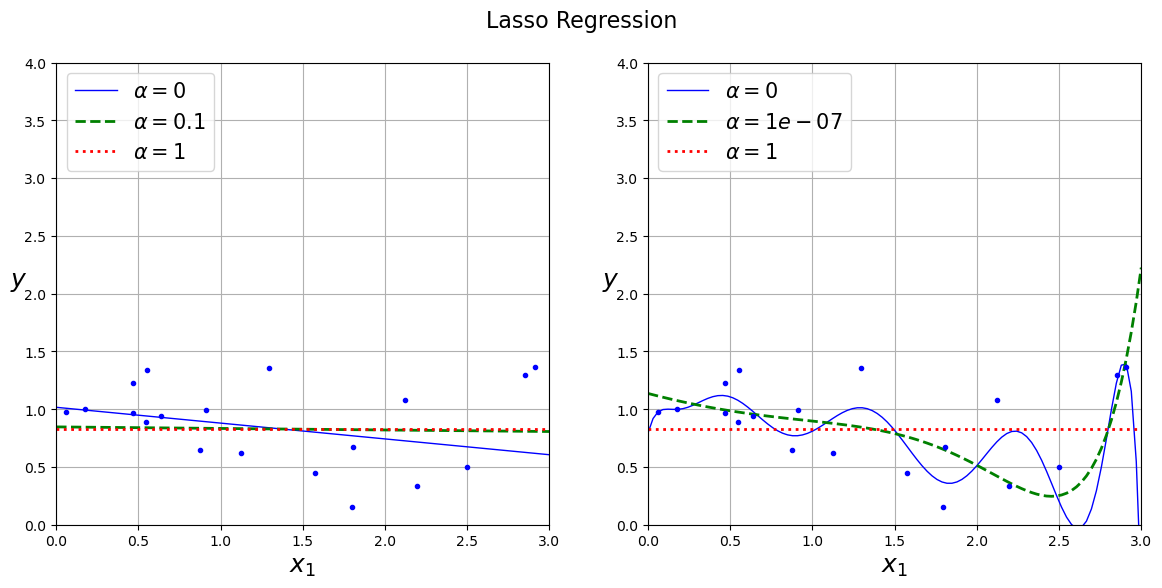

In [36]:
from sklearn.linear_model import Lasso


plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.grid(True)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.grid(True)

plt.figtext(
    x=0.5,
    y=0.95,
    s='Lasso Regression',
    fontsize=16,
    ha='center',
    va='center'
)
plt.show()

In [37]:
from sklearn.linear_model import Lasso


lasso_reg = Lasso(alpha=0.1)  # 'alpha' controls regularization strength in Lasso regression
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([0.82698362])

Plotting comparison Lasso Regression with Ridge Regression

In [38]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

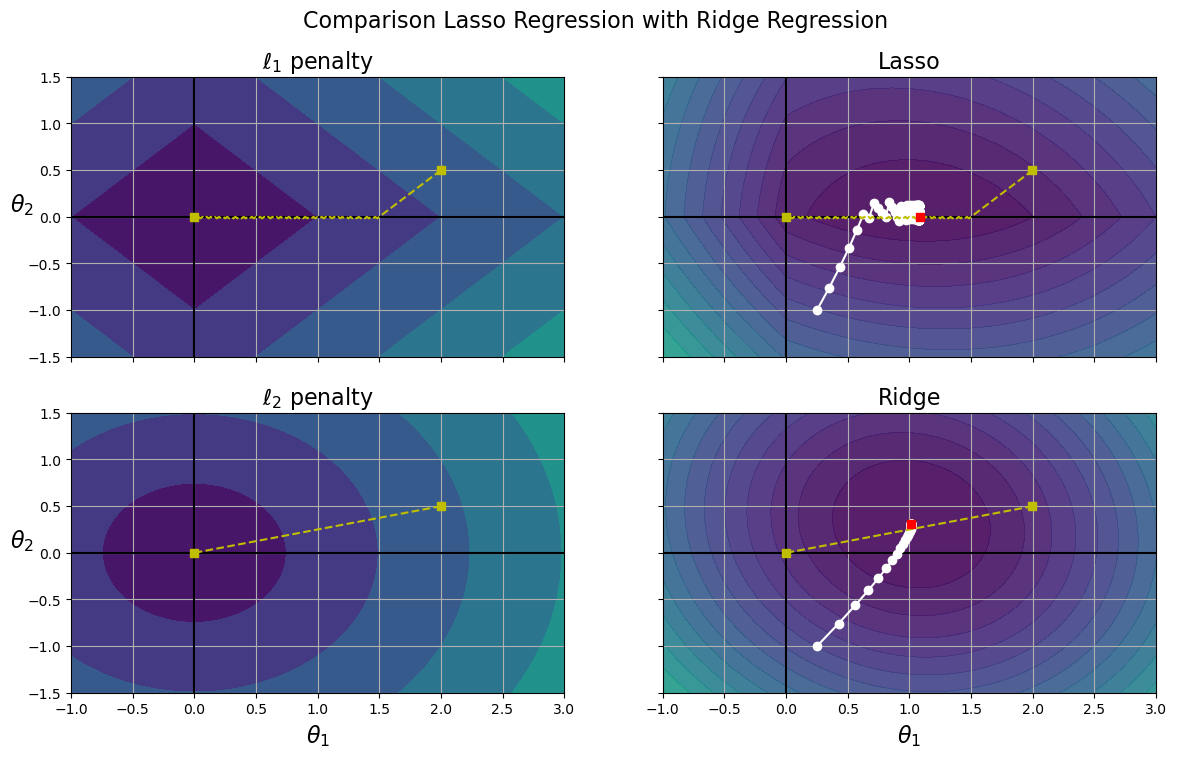

In [39]:
def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]

    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T.dot(X.dot(theta) - y) +
                     l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)

    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14, 8))

for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0, 2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1) / 3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(
        t1,
        t2,
        N / 2.,
        levels=levelsN
    )
    ax.plot(
        path_N[:, 0],
        path_N[:, 1],
        "y--"
    )
    ax.plot(
        0,
        0,
        "ys"
    )
    ax.plot(
        t1_min,
        t2_min,
        "ys"
    )
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])

    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(
        t1,
        t2,
        JR,
        levels=levelsJR,
        alpha=0.9
    )
    ax.plot(
        path_JR[:, 0],
        path_JR[:, 1],
        "w-o"
    )
    ax.plot(
        path_N[:, 0],
        path_N[:, 1],
        "y--"
    )
    ax.plot(
        0,
        0,
        "ys"
    )
    ax.plot(
        t1_min,
        t2_min,
        "ys"
    )
    ax.plot(
        t1r_min,
        t2r_min,
        "rs"
    )
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])

    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.figtext(
    0.5,
    0.95,
    'Comparison Lasso Regression with Ridge Regression',
    fontsize=16,
    ha='center',
    va='center'
)
plt.show()

<h3>Elastic Net</h3>

Elastic Net: Combines L1 and L2 regularization, striking a balance between feature selection and feature grouping in linear regression.

In [40]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  #'l1_ratio' balances L1 and L2 regularization in ElasticNet
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([0.81969978])

<h3>Early Stopping</h3>

Early stopping stops training before completion based on metrics to prevent overfitting and reduce training time.

In [41]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Basic realization of early stopping

In [42]:
from copy import deepcopy


poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    warm_start=True,
    penalty=None,
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Creating the graph

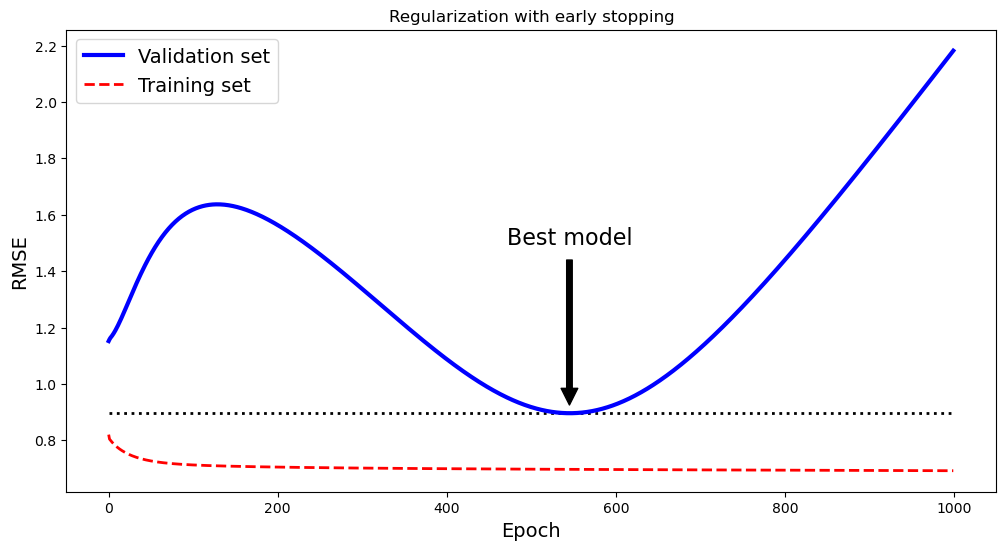

In [43]:
sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    warm_start=True,
    penalty=None,
    learning_rate='constant',
    eta0=0.0005,
    random_state=42
)

n_epochs = 1000
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(12, 6))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 0.6),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

plt.plot(
    [0, n_epochs],
    [best_val_rmse, best_val_rmse],
    "k:",
    linewidth=2
)
plt.plot(
    np.sqrt(val_errors),
    "b-",
    linewidth=3,
    label="Validation set"
)
plt.plot(
    np.sqrt(train_errors),
    "r--",
    linewidth=2,
    label="Training set"
)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title('Regularization with early stopping')
plt.show()

<h2>Logistic Regression</h2>

Logistic Regression is a statistical method used for binary classification tasks. Despite its name, it's used for classification rather than regression. It models the probability of a certain class or event occurring based on input features.

<h3>Decision Boundaries</h3>

Decision boundaries: Lines or surfaces that separate different classes in a dataset, defined by a machine learning model based on learned parameters.

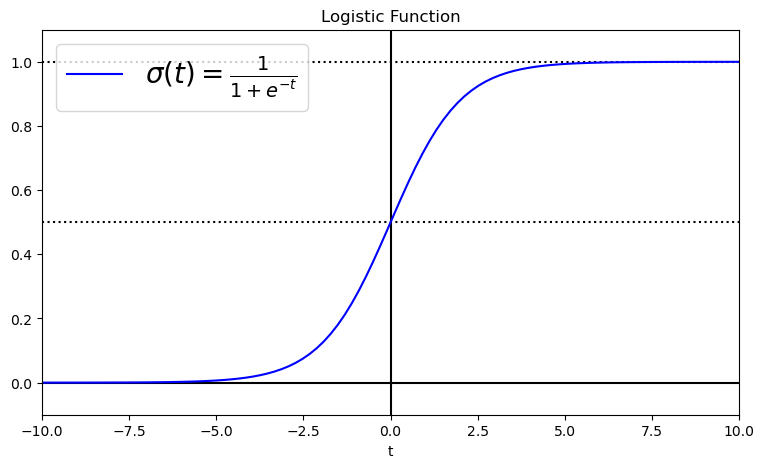

In [44]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 5))
plt.plot(
    [-10, 10],
    [0, 0],
    'k-'
)
plt.plot(
    [-10, 10],
    [0.5, 0.5],
    'k:'
)
plt.plot(
    [-10, 10],
    [1, 1],
    'k:'
)
plt.plot(
    [0, 0],
    [-0.1, 1.1],
    'k-'
)
plt.plot(
    t,
    sig,
    'b-',
    label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$"
)
plt.axis([-10, 10, -0.1, 1.1])
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('t')
plt.title('Logistic Function')
plt.show()

Using the Scikit-Learn Database for Logistic Regression Demonstration

In [45]:
from sklearn import datasets


iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
print(iris.DESCR)  # get iris dataset description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [47]:
# Download the data
X = iris['data'][:, 3:]  # petal width
y = (iris['target'] == 2).astype(np.int64)  # 1 if Iris-Virginica, else 0

The classifier is designed to identify Iris-Virginica solely based on petal width.

In [48]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

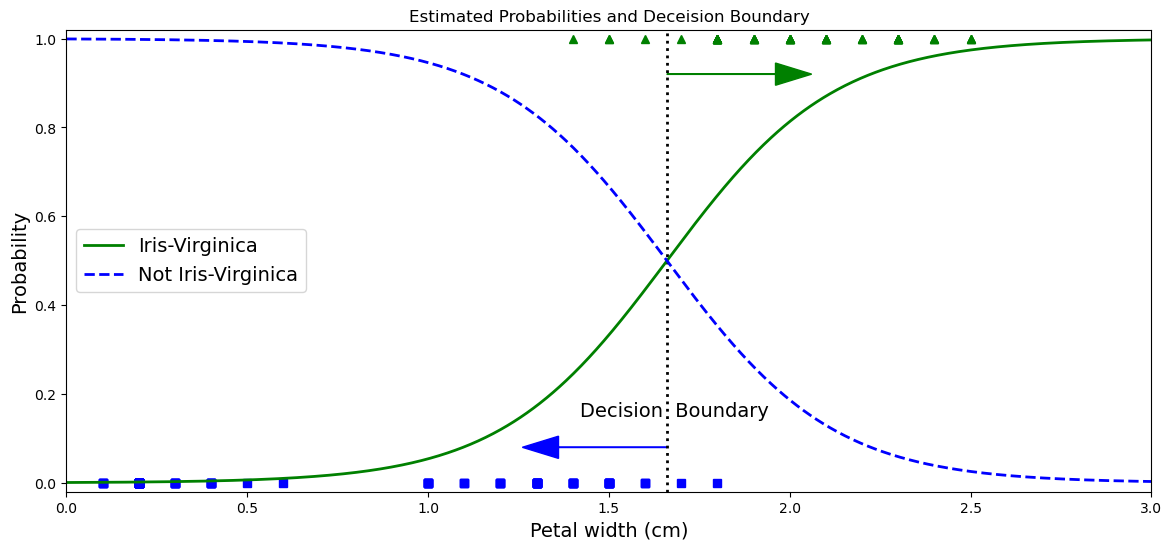

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(14, 6))
plt.plot(
    X[y == 0],
    y[y == 0],
    'bs'
)
plt.plot(
    X[y == 1],
    y[y == 1],
    'g^'
)
plt.plot(
    [decision_boundary, decision_boundary],
    [-1, 2],
    'k:',
    linewidth=2
)
plt.plot(
    X_new,
    y_proba[:, 1],
    'g-',
    linewidth=2,
    label='Iris-Virginica'
)
plt.plot(
    X_new,
    y_proba[:, 0],
    'b--',
    linewidth=2,
    label='Not Iris-Virginica'
)
plt.text(
    x=decision_boundary + 0.02,
    y=0.15,
    s='Decision  Boundary',
    color='k',
    ha='center',
    fontsize=14,
)
plt.arrow(
    x=decision_boundary[0], y=0.08,
    dx=-0.3, dy=0,
    head_width=0.05,
    head_length=0.1,
    fc='b',
    ec='b'
)
plt.arrow(
    x=decision_boundary[0], y=0.92,
    dx=0.3, dy=0,
    head_width=0.05,
    head_length=0.1,
    fc='g',
    ec='g'
)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.title('Estimated Probabilities and Deceision Boundary')
plt.show()

In [50]:
decision_boundary

array([1.66066066])

In [51]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

<h3>Softmax Regression</h3>

Softmax regression expands logistic regression to accommodate multiple classes in classification problems. It calculates class probabilities using the softmax function, aiding in predicting the most probable class for multi-class classification tasks.

In [52]:
from sklearn.linear_model import LogisticRegression


X = iris['data'][:, (2, 3)]  # petal length, petal width
y = (iris['target'] == 2).astype(np.int64)

log_reg = LogisticRegression(C=10**10, random_state=42)  # 'C' parameter for regularization
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

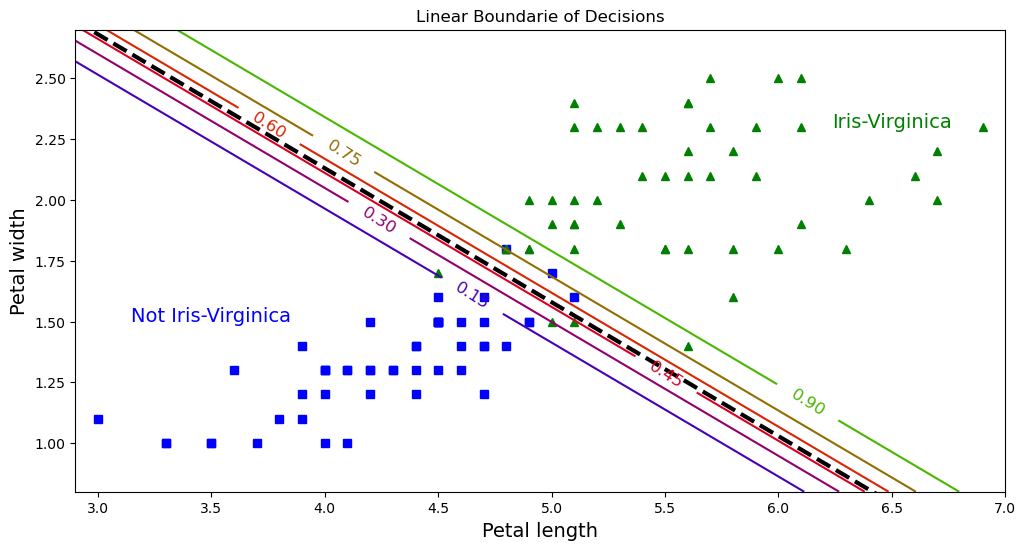

In [53]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12, 6))
plt.plot(
    X[y == 0, 0],
    X[y == 0, 1],
    "bs"
)
plt.plot(
    X[y == 1, 0],
    X[y == 1, 1],
    "g^"
)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(
    x0,
    x1,
    zz,
    cmap=plt.cm.brg
)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(
    left_right,
    boundary,
    "k--",
    linewidth=3
)
plt.text(
    3.5,
    1.5,
    "Not Iris-Virginica",
    fontsize=14,
    color="b",
    ha="center"
)
plt.text(
    6.5,
    2.3,
    "Iris-Virginica",
    fontsize=14,
    color="g",
    ha="center"
)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.title('Linear Boundarie of Decisions')
plt.show()

LogisticRegression hyperparameter `multi_class='multinomial'` to switch to Softmax Regression.

In [54]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', C=10, random_state=42)  # 'multinomial' for multi-class classification
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

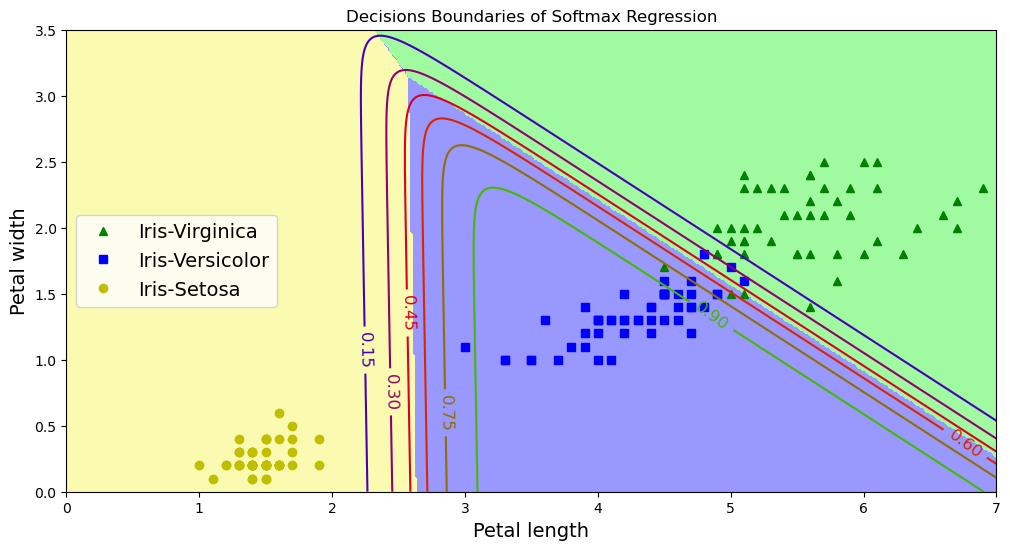

In [55]:
from matplotlib.colors import ListedColormap


x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 6))
plt.plot(
    X[y == 2, 0],
    X[y == 2, 1],
    "g^",
    label="Iris-Virginica"
)
plt.plot(
    X[y == 1, 0],
    X[y == 1, 1],
    "bs",
    label="Iris-Versicolor"
)
plt.plot(
    X[y == 0, 0],
    X[y == 0, 1],
    "yo",
    label="Iris-Setosa"
)

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(
    x0,
    x1,
    zz,
    cmap=custom_cmap
)
contour = plt.contour(
    x0,
    x1,
    zz1,
    cmap=plt.cm.brg
)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title('Decisions Boundaries of Softmax Regression')
plt.show()

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])